In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df1 = df.drop(['society','area_type','availability','location'],axis='columns')

In [ ]:
df1.isna().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df1['balcony'] = df1['balcony'].fillna(df1.balcony.median())

In [ ]:
df1.isna().sum()

size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [ ]:
df1['bath'] = df1['bath'].fillna(df1.bath.median())

In [ ]:
df1.isna().sum()

size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [ ]:
df2 = df1.dropna()

In [ ]:
df2.isna().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [ ]:
df2.shape

(13304, 5)

In [ ]:
df2.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df2['size'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

<ipython-input-157-2bab3ce8ce84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


In [ ]:
df2['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
df2['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [ ]:
df2['balcony'].unique()

array([1., 3., 2., 0.])

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df2[~df2['total_sqft'].apply(is_float)]

,size,total_sqft,bath,balcony,price
30,4,2100 - 2850,4.0,0.0,186.000
56,4,3010 - 3410,2.0,2.0,192.000
81,4,2957 - 3450,2.0,2.0,224.500
122,4,3067 - 8156,4.0,0.0,477.000
137,2,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...
12990,3,1804 - 2273,3.0,0.0,122.000
13059,2,1200 - 1470,2.0,0.0,72.760
13240,1,1020 - 1130,2.0,2.0,52.570
13265,2,1133 - 1384,2.0,0.0,59.135


In [ ]:
def convert_float(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2.0
  try:
    return float(x)
  except:
    return None

In [ ]:
convert_float('1804 - 2273')

2038.5

In [ ]:
df3 = df2.copy()

In [ ]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_float)

In [ ]:
df3.head()

,size,total_sqft,bath,balcony,price
0,2,1056.0,2.0,1.0,39.07
1,4,2600.0,5.0,3.0,120.00
2,3,1440.0,2.0,3.0,62.00
3,3,1521.0,3.0,1.0,95.00
4,2,1200.0,2.0,1.0,51.00


In [ ]:
df3['location'] = df.location

In [ ]:
df3.head()

,size,total_sqft,bath,balcony,price,location
0,2,1056.0,2.0,1.0,39.07,Electronic City Phase II
1,4,2600.0,5.0,3.0,120.00,Chikka Tirupathi
2,3,1440.0,2.0,3.0,62.00,Uttarahalli
3,3,1521.0,3.0,1.0,95.00,Lingadheeranahalli
4,2,1200.0,2.0,1.0,51.00,Kothanur


In [ ]:
df3.isna().sum()

size           0
total_sqft    46
bath           0
balcony        0
price          0
location       1
dtype: int64

In [ ]:
df4 = df3.dropna()

In [ ]:
df4.shape

(13257, 6)

In [ ]:
df5 = df4.copy()

In [ ]:
df4.head()

,size,total_sqft,bath,balcony,price,location
0,2,1056.0,2.0,1.0,39.07,Electronic City Phase II
1,4,2600.0,5.0,3.0,120.00,Chikka Tirupathi
2,3,1440.0,2.0,3.0,62.00,Uttarahalli
3,3,1521.0,3.0,1.0,95.00,Lingadheeranahalli
4,2,1200.0,2.0,1.0,51.00,Kothanur


In [ ]:
len(df4['location'].unique())

1298

In [ ]:
location_values = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [ ]:
location_values_lessthan10 = location_values[location_values < 10]

In [ ]:
df5['location'] = df4['location'].apply(lambda x : 'other' if x in location_values_lessthan10 else x)

In [ ]:
len(df5.location.unique())

254

In [ ]:
df5.head(10)

,size,total_sqft,bath,balcony,price,location
0,2,1056.0,2.0,1.0,39.07,Electronic City Phase II
1,4,2600.0,5.0,3.0,120.00,Chikka Tirupathi
2,3,1440.0,2.0,3.0,62.00,Uttarahalli
3,3,1521.0,3.0,1.0,95.00,Lingadheeranahalli
4,2,1200.0,2.0,1.0,51.00,Kothanur
5,2,1170.0,2.0,1.0,38.00,Whitefield
6,4,2732.0,4.0,2.0,204.00,Old Airport Road
7,4,3300.0,4.0,2.0,600.00,Rajaji Nagar
8,3,1310.0,3.0,1.0,63.25,Marathahalli
9,6,1020.0,6.0,2.0,370.00,other


In [ ]:
df5['price_per_sqrft'] = (df5['price']*100000)/df5['total_sqft']

In [ ]:
df5.head(10)

,size,total_sqft,bath,balcony,price,location,price_per_sqrft
0,2,1056.0,2.0,1.0,39.07,Electronic City Phase II,3699.810606
1,4,2600.0,5.0,3.0,120.00,Chikka Tirupathi,4615.384615
2,3,1440.0,2.0,3.0,62.00,Uttarahalli,4305.555556
3,3,1521.0,3.0,1.0,95.00,Lingadheeranahalli,6245.890861
4,2,1200.0,2.0,1.0,51.00,Kothanur,4250.000000
5,2,1170.0,2.0,1.0,38.00,Whitefield,3247.863248
6,4,2732.0,4.0,2.0,204.00,Old Airport Road,7467.057101
7,4,3300.0,4.0,2.0,600.00,Rajaji Nagar,18181.818182
8,3,1310.0,3.0,1.0,63.25,Marathahalli,4828.244275
9,6,1020.0,6.0,2.0,370.00,other,36274.509804


In [ ]:
df5['Bedrooms'] = df1['size']

In [ ]:
df5.head(10)

,size,total_sqft,bath,balcony,price,location,price_per_sqrft,Bedrooms
0,2,1056.0,2.0,1.0,39.07,Electronic City Phase II,3699.810606,2 BHK
1,4,2600.0,5.0,3.0,120.00,Chikka Tirupathi,4615.384615,4 Bedroom
2,3,1440.0,2.0,3.0,62.00,Uttarahalli,4305.555556,3 BHK
3,3,1521.0,3.0,1.0,95.00,Lingadheeranahalli,6245.890861,3 BHK
4,2,1200.0,2.0,1.0,51.00,Kothanur,4250.000000,2 BHK
5,2,1170.0,2.0,1.0,38.00,Whitefield,3247.863248,2 BHK
6,4,2732.0,4.0,2.0,204.00,Old Airport Road,7467.057101,4 BHK
7,4,3300.0,4.0,2.0,600.00,Rajaji Nagar,18181.818182,4 BHK
8,3,1310.0,3.0,1.0,63.25,Marathahalli,4828.244275,3 BHK
9,6,1020.0,6.0,2.0,370.00,other,36274.509804,6 Bedroom


In [ ]:
df5.shape

(13257, 8)

In [ ]:
df6 = df5[~((df5['total_sqft']/df5['size']) < 300)]

In [ ]:
df6.price_per_sqrft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqrft, dtype: float64

In [ ]:
def remove_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqrft)
    std = np.std(subdf.price_per_sqrft)
    reduced_df = subdf[(subdf.price_per_sqrft >= (m-std)) & (subdf.price_per_sqrft <= (m+std))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [ ]:
df7 = remove_outliers(df6)

In [ ]:
df7.shape

(10271, 8)

In [ ]:
df7.head()

,size,total_sqft,bath,balcony,price,location,price_per_sqrft,Bedrooms
0,3,1250.0,2.0,3.0,44.0,Devarachikkanahalli,3520.000000,3 BHK
1,2,1250.0,2.0,2.0,40.0,Devarachikkanahalli,3200.000000,2 BHK
2,2,1200.0,2.0,2.0,83.0,Devarachikkanahalli,6916.666667,2 Bedroom
3,2,1170.0,2.0,2.0,40.0,Devarachikkanahalli,3418.803419,2 BHK
4,3,1425.0,2.0,2.0,65.0,Devarachikkanahalli,4561.403509,3 BHK


In [ ]:
df7[(df7['location'] == "other") & (df7.size == 2)]

,size,total_sqft,bath,balcony,price,location,price_per_sqrft,Bedrooms


In [ ]:
df7.size.dtype

dtype('int64')

In [ ]:
df7['location'].unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout',
       'Babusapalaya', 'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
     

In [ ]:
df7[df7['size'] == 2]

,size,total_sqft,bath,balcony,price,location,price_per_sqrft,Bedrooms
1,2,1250.0,2.0,2.0,40.0,Devarachikkanahalli,3200.000000,2 BHK
2,2,1200.0,2.0,2.0,83.0,Devarachikkanahalli,6916.666667,2 Bedroom
3,2,1170.0,2.0,2.0,40.0,Devarachikkanahalli,3418.803419,2 BHK
5,2,947.0,2.0,2.0,43.0,Devarachikkanahalli,4540.654699,2 BHK
6,2,1130.0,2.0,2.0,36.0,Devarachikkanahalli,3185.840708,2 BHK
...,...,...,...,...,...,...,...,...
10262,2,1200.0,2.0,3.0,70.0,other,5833.333333,2 BHK
10264,2,1095.0,2.0,1.0,57.0,other,5205.479452,2 BHK
10265,2,1256.0,2.0,1.0,65.0,other,5175.159236,2 BHK
10266,2,1353.0,2.0,2.0,110.0,other,8130.081301,2 BHK


In [ ]:
def remove_bhk_outlies(df):
  check = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_description = {}
    for bhk, bhk_df in df.groupby('size'):
      bhk_description[bhk] = {
          'mean' : np.mean(bhk_df.price_per_sqrft),
          'std' : np.std(bhk_df.price_per_sqrft),
          'count' : bhk_df.shape[0]
      }
    for bhk, bhk_df in df.groupby('size'):
      prev_check = bhk_description.get(bhk-1)
      if prev_check and (prev_check['count'] > 5):
        check = np.append(check, bhk_df[bhk_df.price_per_sqrft < prev_check['mean']].index.values)
  return df.drop(check,axis='index')

In [ ]:
df7.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout',
       'Babusapalaya', 'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
     

In [ ]:
def scatter_plot(df,location):
  bhk2 = df[(df.location == location) & (df['size'] == 2)]
  bhk3 = df[(df.location == location) & (df['size'] == 3)]
  matplotlib.rcParams["figure.figsize"] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,label='BHK 2',color='blue', s =50)
  plt.scatter(bhk3.total_sqft,bhk3.price,label='BHK 3',color='green',marker='+', s =50)
  plt.legend()

In [ ]:
print(scatter_plot)

<function scatter_plot at 0x788b6bc5ef80>


In [ ]:
df8 = remove_bhk_outlies(df7)

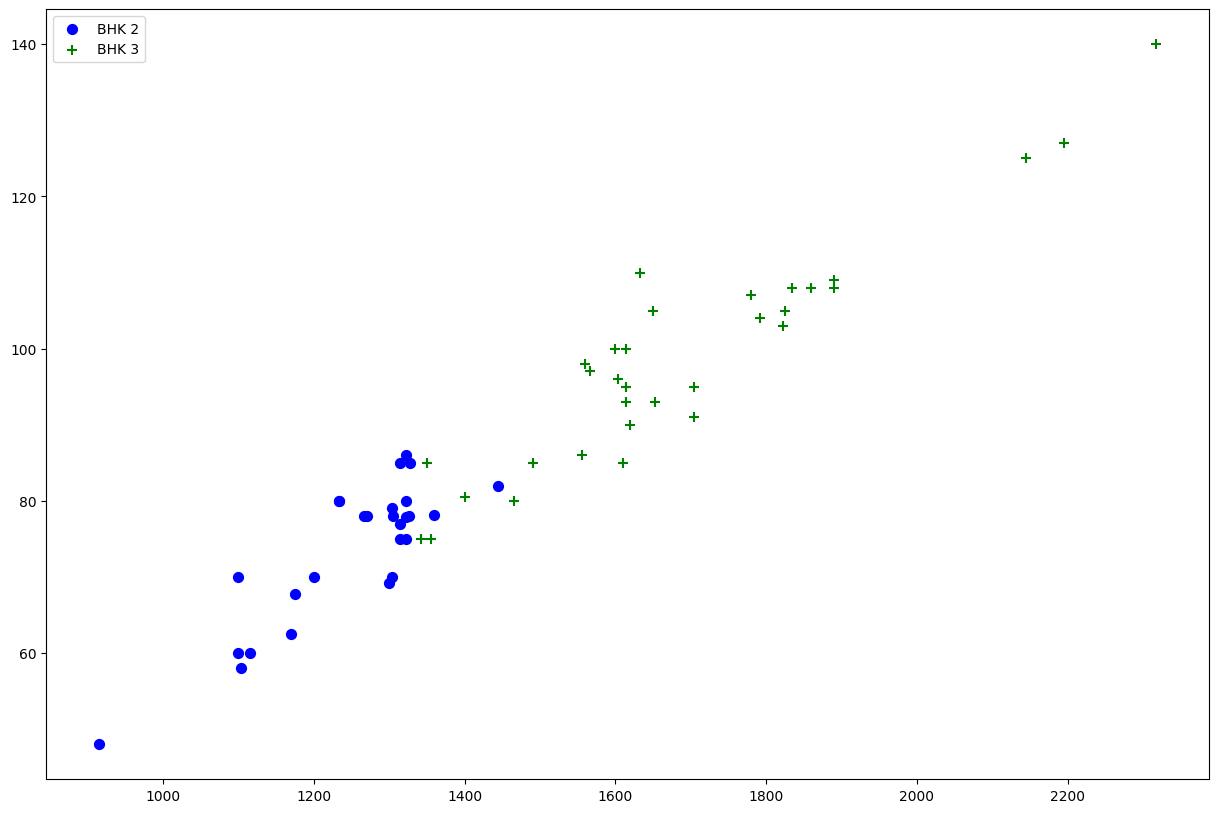

In [ ]:
scatter_plot(df8,'Yelahanka')

In [ ]:
df8.shape

(5375, 8)

(array([ 114., 1922., 2395.,  482.,  263.,  125.,   43.,   19.,    7.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

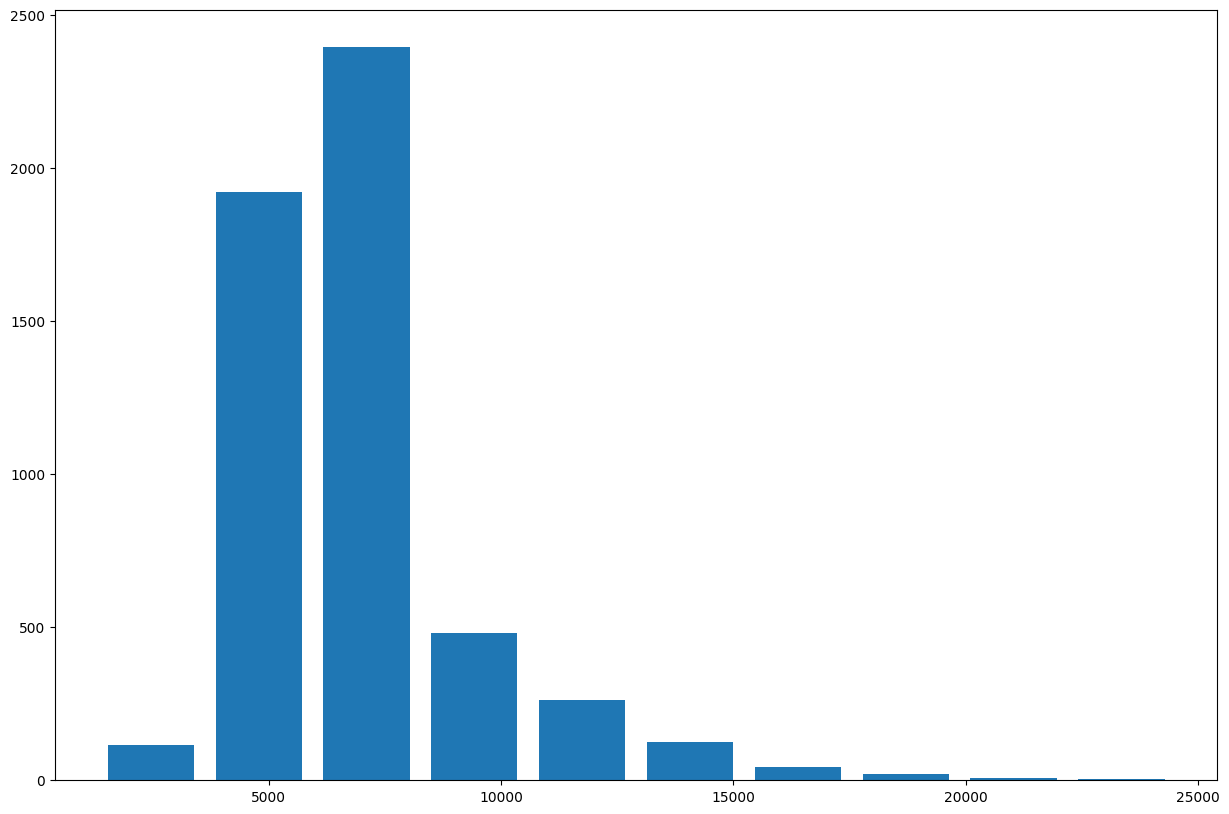

In [ ]:
plt.hist(df8.price_per_sqrft,rwidth = 0.8)

(array([2.915e+03, 1.722e+03, 6.620e+02, 5.800e+01, 9.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

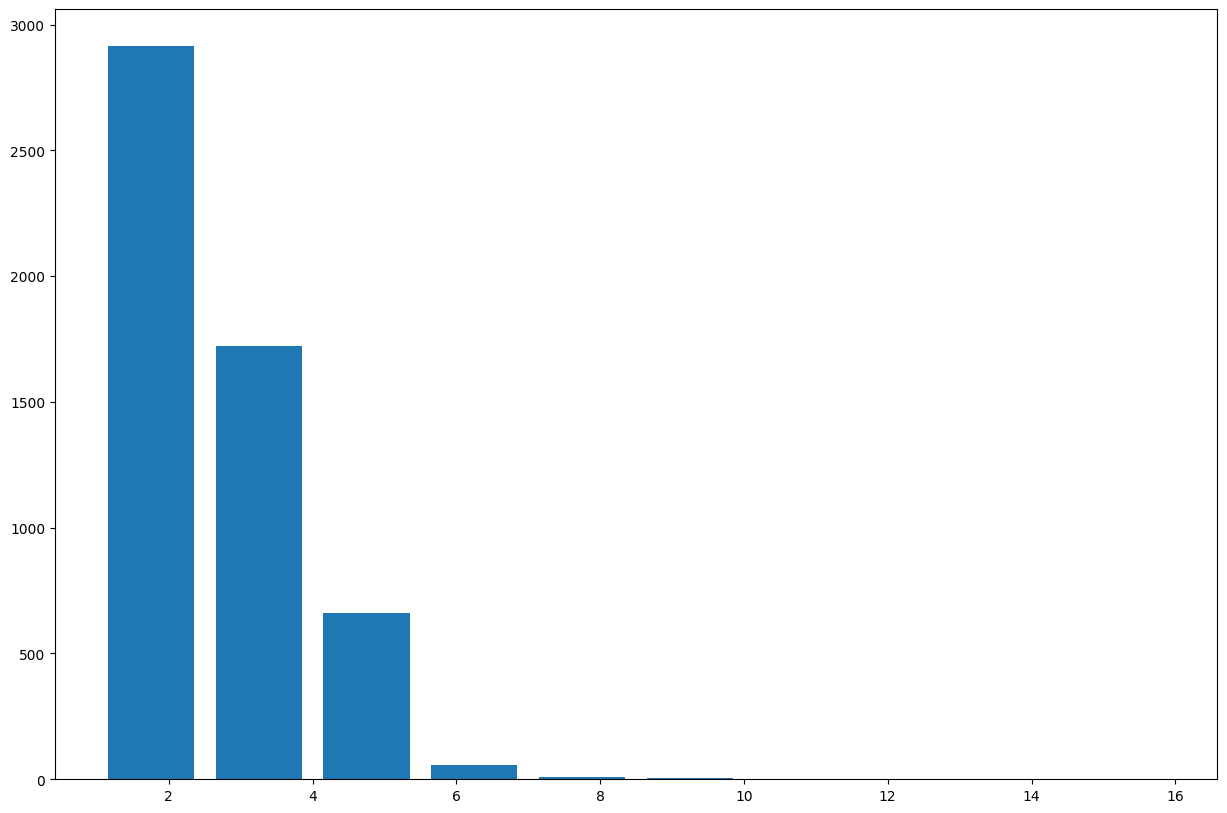

In [ ]:
plt.hist(df8.bath,rwidth = 0.8)

In [ ]:
df8[~((df8.bath) > (df8.size + 2))]

,size,total_sqft,bath,balcony,price,location,price_per_sqrft,Bedrooms
2,2,1200.0,2.0,2.0,83.0,Devarachikkanahalli,6916.666667,2 Bedroom
7,3,1417.0,2.0,2.0,76.0,Devarachikkanahalli,5363.443896,3 BHK
13,4,2850.0,4.0,1.0,428.0,1st Block Jayanagar,15017.543860,4 BHK
14,3,1630.0,3.0,2.0,194.0,1st Block Jayanagar,11901.840491,3 BHK
15,3,1875.0,2.0,3.0,235.0,1st Block Jayanagar,12533.333333,3 BHK
...,...,...,...,...,...,...,...,...
10264,2,1095.0,2.0,1.0,57.0,other,5205.479452,2 BHK
10265,2,1256.0,2.0,1.0,65.0,other,5175.159236,2 BHK
10266,2,1353.0,2.0,2.0,110.0,other,8130.081301,2 BHK
10267,1,812.0,1.0,0.0,26.0,other,3201.970443,1 Bedroom


In [ ]:
df9 = df8.drop(['price_per_sqrft','Bedrooms'],axis='columns')

In [ ]:
df9.shape

(5375, 6)

In [ ]:
df9.head()

,size,total_sqft,bath,balcony,price,location
2,2,1200.0,2.0,2.0,83.0,Devarachikkanahalli
7,3,1417.0,2.0,2.0,76.0,Devarachikkanahalli
13,4,2850.0,4.0,1.0,428.0,1st Block Jayanagar
14,3,1630.0,3.0,2.0,194.0,1st Block Jayanagar
15,3,1875.0,2.0,3.0,235.0,1st Block Jayanagar


In [ ]:
dummies = pd.get_dummies(df9.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df10 = pd.concat([df9,dummies.drop(['other'],axis='columns')],axis='columns')

In [ ]:
df10.head()

,size,total_sqft,bath,balcony,price,location,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
2,2,1200.0,2.0,2.0,83.0,Devarachikkanahalli,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1417.0,2.0,2.0,76.0,Devarachikkanahalli,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4,2850.0,4.0,1.0,428.0,1st Block Jayanagar,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,1630.0,3.0,2.0,194.0,1st Block Jayanagar,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,1875.0,2.0,3.0,235.0,1st Block Jayanagar,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = df10.drop(['location'],axis='columns')

In [ ]:
df11.isna().sum()

size                  0
total_sqft            0
bath                  0
balcony               0
price                 0
                     ..
Whitefield            0
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yeshwanthpur          0
Length: 234, dtype: int64

In [ ]:
X = df11.drop(['price'],axis = 'columns')
Y = df11.price

In [ ]:
X.head()

,size,total_sqft,bath,balcony,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
2,2,1200.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1417.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4,2850.0,4.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,1630.0,3.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,1875.0,2.0,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y.head()

2      83.0
7      76.0
13    428.0
14    194.0
15    235.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.9,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression(positive=True)

In [ ]:
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
LR.score(X_test,Y_test)

0.8440222397123256

In [ ]:
LR.predict(X_test)[1]

122.32507133287629

In [ ]:
Y_test

5646    160.0
7737    128.0
1966     56.1
3631    108.0
4174     83.0
        ...  
4090     50.0
4461     67.0
324      80.0
9988     75.0
9757    115.0
Name: price, Length: 538, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
cv = ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)

In [ ]:
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([ 7.92465735e-01,  8.02410757e-01, -3.70030806e+15, -7.75716065e+10,
        8.66695825e-01])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def find_best_model_using_GridSearchCV(X,Y):
  algos = {
      'linear Regression' : {
          'model' : LinearRegression(),
          'params' : {
              'positive' : [True,False]
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1,2],
              'selection' : ['random','cyclic']
          }
      },
      'decision tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['squared_error','friedman_mse'],
              'splitter' : ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
  for algo_name,config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False,error_score='raise')
    gs.fit(X,Y)
    scores.append({
        'model' : algo_name,
        'best score' : gs.best_score_,
        'best param' : gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best score','best param'])

In [ ]:
find_best_model_using_GridSearchCV(X,Y)

,model,best score,best param
0,linear Regression,0.815534,{'positive': True}
1,lasso,0.720450,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.696684,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
LR.fit(X_train,Y_train)

LinearRegression(positive=True)

In [ ]:
LR.score(X_test,Y_test)

0.8359264749926469

In [ ]:
def predict_price(location,sqft,bath,bhk,balcony):
  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  x[3] = balcony
  if loc_index >= 0:
    loc_index = 1
  return LR.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000,3,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3536.0662116380495

In [ ]:
predict_price('1st Phase JP Nagar',1000,2,3,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3540.009828032315

In [ ]:
predict_price('Indira Nagar',3000,2,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10678.138573489556

In [ ]:
import pickle

In [ ]:
with open('bangalore_home_price_model.pickle','wb') as f:
  pickle.dump(LR,f)

In [ ]:
import json

In [ ]:
columns = {
    'data columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))